In [2]:
import mglearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


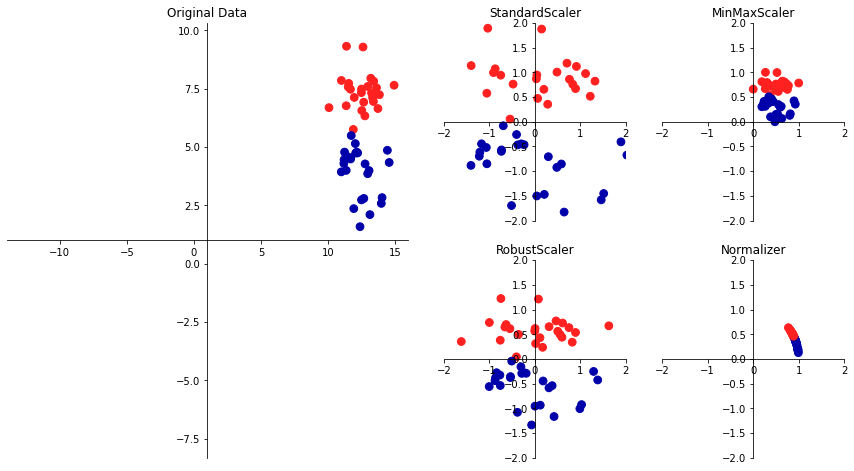

In [3]:
mglearn.plots.plot_scaling()

In [4]:
cancer=load_breast_cancer()
xtr,xte,ytr,yte=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=1)
print(xtr.shape,xte.shape)

(426, 30) (143, 30)


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(xtr)


MinMaxScaler()

In [6]:
xtr_scaled=scaler.transform(xtr)
ytr_scaled=scaler.transform(xte)
print("min before scalin={}".format(xtr.min(axis=0)))
print("max before scalin={}".format(xtr.max(axis=0)))
print("min after scalin={}".format(xtr_scaled.min(axis=0)))

print("max after scalin={}".format(xtr_scaled.max(axis=0)))

min before scalin=[6.981e+00 1.038e+01 4.379e+01 1.435e+02 5.263e-02 2.650e-02 0.000e+00
 0.000e+00 1.167e-01 5.025e-02 1.144e-01 3.602e-01 7.570e-01 6.802e+00
 2.667e-03 3.746e-03 0.000e+00 0.000e+00 7.882e-03 9.502e-04 7.930e+00
 1.249e+01 5.041e+01 1.852e+02 8.409e-02 4.327e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
max before scalin=[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.264e-01
 1.913e-01 2.906e-01 9.575e-02 2.873e+00 3.647e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 5.774e-01 2.075e-01]
min after scalin=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
max after scalin=[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [7]:
from sklearn.svm import SVC
svm=SVC(C=100)
svm.fit(xtr,ytr)
print(svm.score(xte,yte))

0.9300699300699301


In [8]:
scaler=MinMaxScaler()

In [9]:
scaler.fit(xtr)

MinMaxScaler()

In [10]:
xtr_scaled=scaler.transform(xtr)

In [11]:
xte_scaled=scaler.transform(xte)


In [12]:
svm.fit(xte_scaled,yte)

SVC(C=100)

In [13]:
print(svm.score(xte_scaled,yte))

1.0


In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(xtr)
xtr_s=scaler.transform(xtr)
xte_s=scaler.transform(xte)

In [15]:
svm=SVC(C=100)

In [16]:
svm.fit(xtr,ytr)

SVC(C=100)

In [17]:
print(svm.score(xte_s,yte))

0.6293706293706294


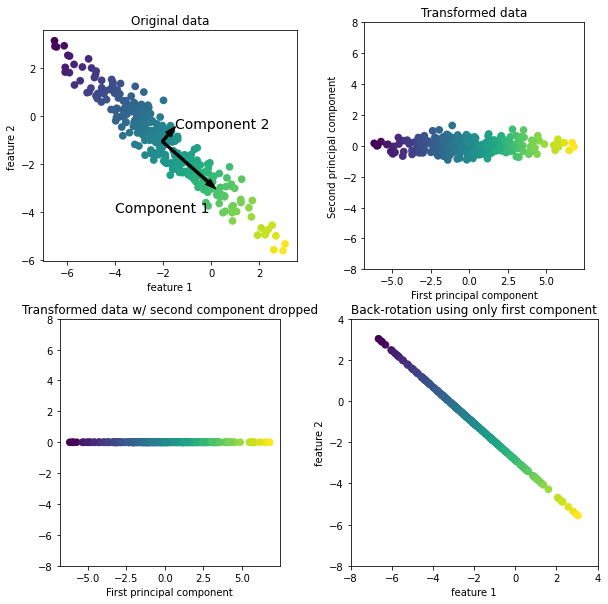

In [18]:
mglearn.plots.plot_pca_illustration()

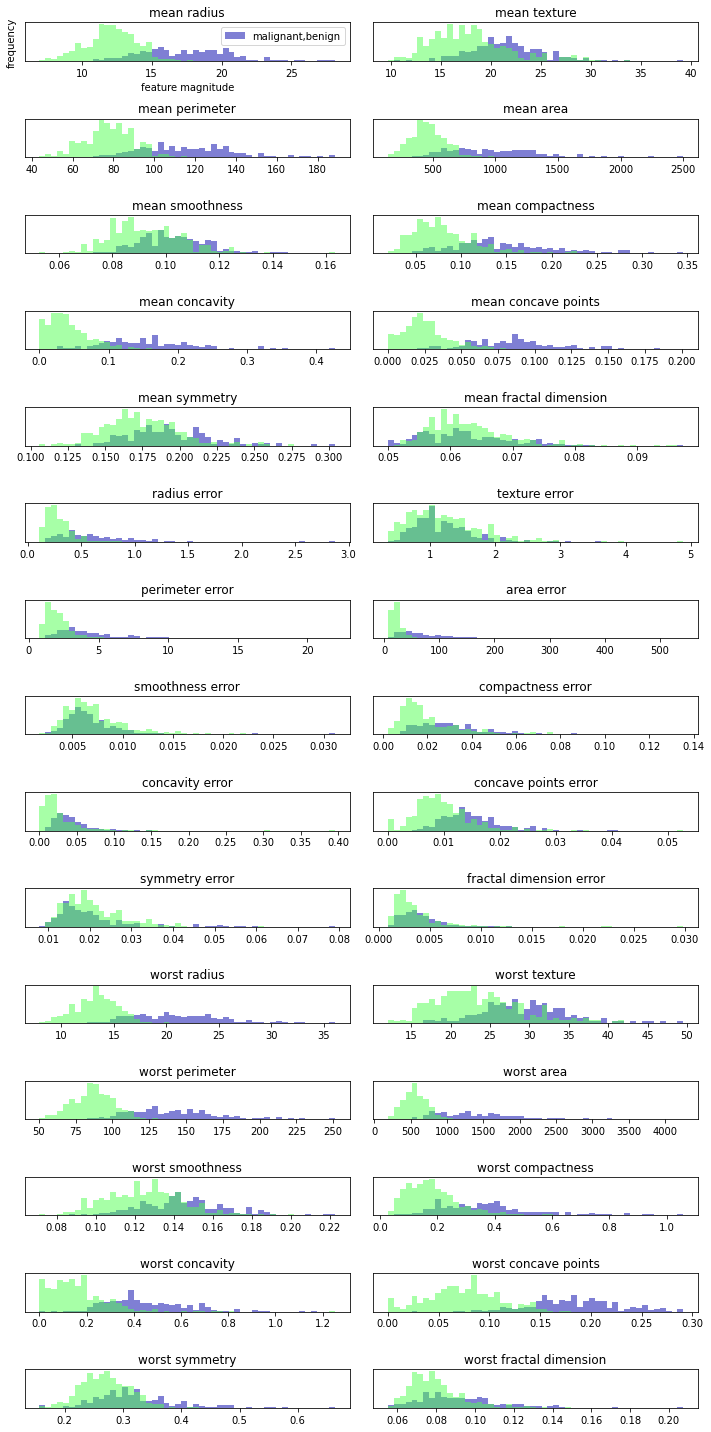

In [19]:
import matplotlib.pyplot as plt
import numpy as np
fig,axes=plt.subplots(15,2,figsize=(10,20))
malignant=cancer.data[cancer.target==0]
benign=cancer.data[cancer.target==1]
ax=axes.ravel()

for i in range(30):
    _,bins=np.histogram(cancer.data[:,i],bins=50)
    ax[i].hist(malignant[:,i],bins=bins,color=mglearn.cm3(0),alpha=0.5)
    ax[i].hist(benign[:,i],bins=bins,color=mglearn.cm3(2),alpha=0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
    
ax[0].set_xlabel("feature magnitude")
ax[0].set_ylabel("frequency")
ax[0].legend(["malignant,benign"],loc="best")
fig.tight_layout()

In [20]:
scaler=StandardScaler()
scaler.fit(xtr)
xtr_s=scaler.transform(xtr)

In [21]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(xtr_s)
xpca=pca.transform(xtr_s)

In [22]:
print(xtr_s.shape,xpca.shape)

(426, 30) (426, 2)


Text(0, 0.5, 'second comp')

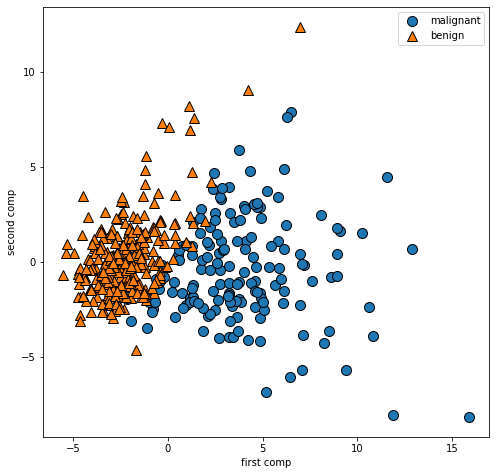

In [23]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(xpca[:,0],xpca[:,1],ytr)
plt.legend(cancer.target_names,loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("first comp")
plt.ylabel("second comp")

Text(0, 0.5, 'PCA')

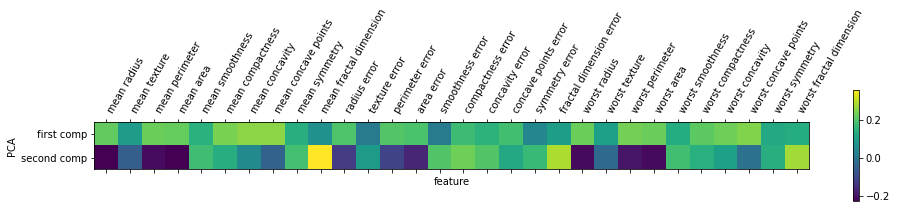

In [24]:
plt.matshow(pca.components_,cmap="viridis")
plt.yticks([0,1],["first comp","second comp"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names,rotation=60,ha='left')
plt.xlabel("feature")
plt.ylabel("PCA")

In [25]:
# print(cancer.data.shape)
from sklearn.linear_model import LogisticRegression
xtr,xte,ytr,yte=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=1)
xtrscaled=scaler.transform(xtr)
xpca=pca.transform(xtr_scaled)
# print(pca.components_)
logreg=LogisticRegression()
logreg.fit(xpca,ytr)

LogisticRegression()

Text(0, 0.5, 'feature2/component2')

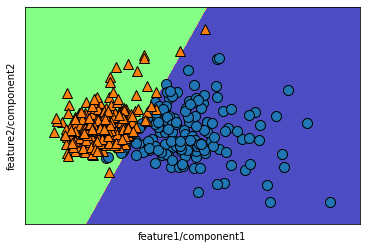

In [27]:
mglearn.plots.plot_2d_classification(logreg,xpca,fill=True,alpha=0.7)

mglearn.discrete_scatter(xpca[:,0],xpca[:,1],ytr)
plt.xlabel("feature1/component1")
plt.ylabel("feature2/component2")



In [28]:
from sklearn.datasets import fetch_lfw_people
people=fetch_lfw_people(min_faces_per_person=20,resize=0.7)
image_shape=people.images[0].shape


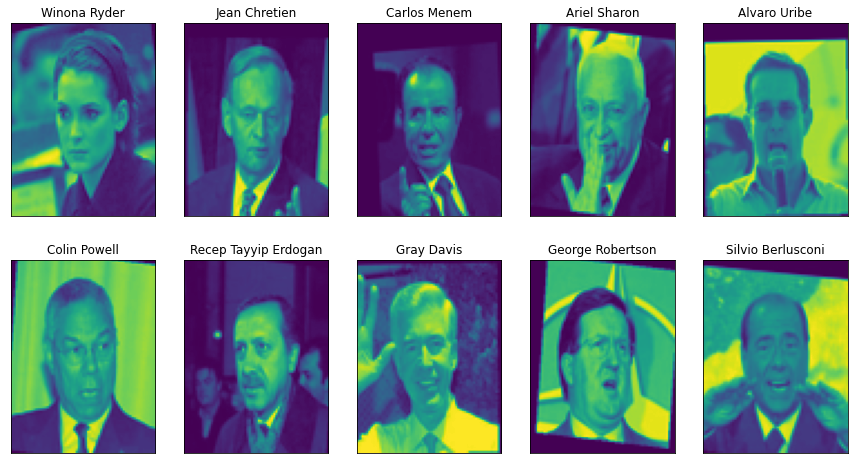

In [29]:
fig,axes=plt.subplots(2,5, figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})
for target,image,ax in zip(people.target,people.images,axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])
    

In [30]:
counts=np.bincount(people.target)
for i,(count,name) in enumerate(zip(counts,people.target_names)):
    print("{0:25}{1:3}".format(name,count),end= '   ')
    if(i+1)%3==0:
        print()

Alejandro Toledo          39   Alvaro Uribe              35   Amelie Mauresmo           21   
Andre Agassi              36   Angelina Jolie            20   Ariel Sharon              77   
Arnold Schwarzenegger     42   Atal Bihari Vajpayee      24   Bill Clinton              29   
Carlos Menem              21   Colin Powell             236   David Beckham             31   
Donald Rumsfeld          121   George Robertson          22   George W Bush            530   
Gerhard Schroeder        109   Gloria Macapagal Arroyo   44   Gray Davis                26   
Guillermo Coria           30   Hamid Karzai              22   Hans Blix                 39   
Hugo Chavez               71   Igor Ivanov               20   Jack Straw                28   
Jacques Chirac            52   Jean Chretien             55   Jennifer Aniston          21   
Jennifer Capriati         42   Jennifer Lopez            21   Jeremy Greenstock         24   
Jiang Zemin               20   John Ashcroft             53 

In [31]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255.

C:\Users\WIN10~1\AppData\Local\Temp/ipykernel_33668/4074958598.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(people.target.shape, dtype=np.bool)


In [32]:
from sklearn.neighbors import KNeighborsClassifier
xtr,xte,ytr,yte=train_test_split(X_people,y_people,random_state=0)
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(xtr,ytr)

KNeighborsClassifier(n_neighbors=1)

In [33]:
print(knn.score(xte,yte))

0.15891472868217055


In [34]:
pca=PCA(n_components=100,whiten=True,random_state=0).fit(xtr)

In [35]:
xtr_pca=pca.transform(xtr)
xte_pca=pca.transform(xte)

In [36]:
knn.fit(xtr_pca,ytr)

KNeighborsClassifier(n_neighbors=1)

In [37]:
print(knn.score(xte_pca,yte))

0.1434108527131783


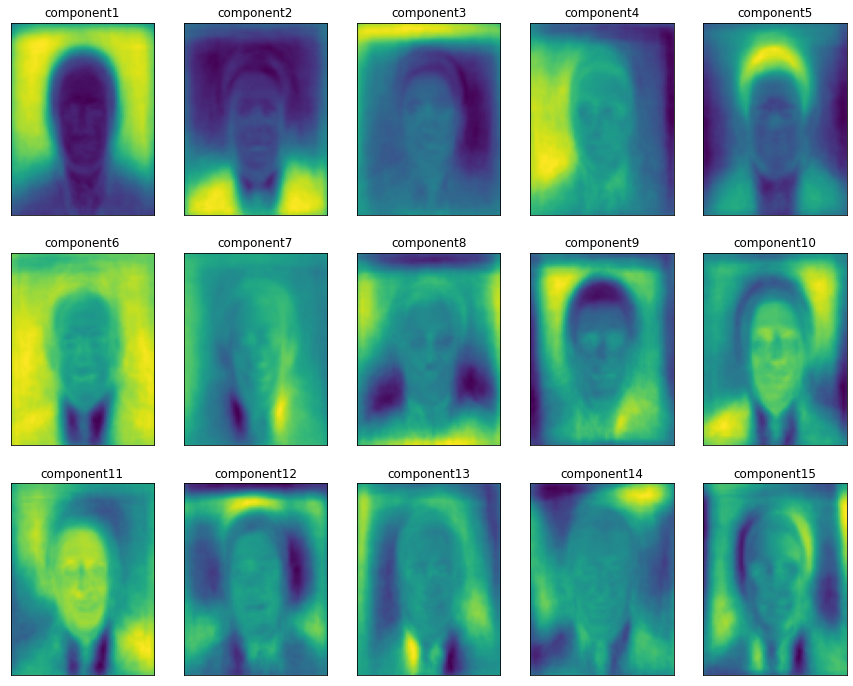

In [38]:
figs,axes=plt.subplots(3,5,figsize=(15,12),subplot_kw={'xticks': (), 'yticks': ()})
for i,(component,ax) in enumerate(zip(pca.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap='viridis')
    ax.set_title("component{}".format(i+1))


Text(0, 0.5, 'second component')

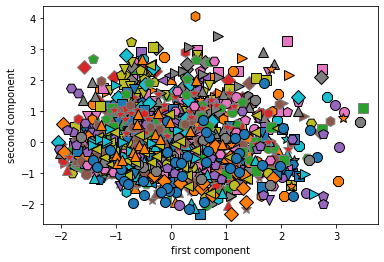

In [39]:
mglearn.discrete_scatter(xtr_pca[:,0],xtr_pca[:,1],ytr)
plt.xlabel("first component")
plt.ylabel("second component")

C:\anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


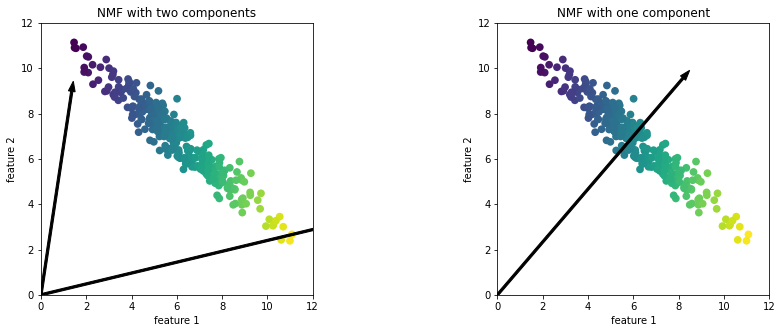

In [40]:
mglearn.plots.plot_nmf_illustration()

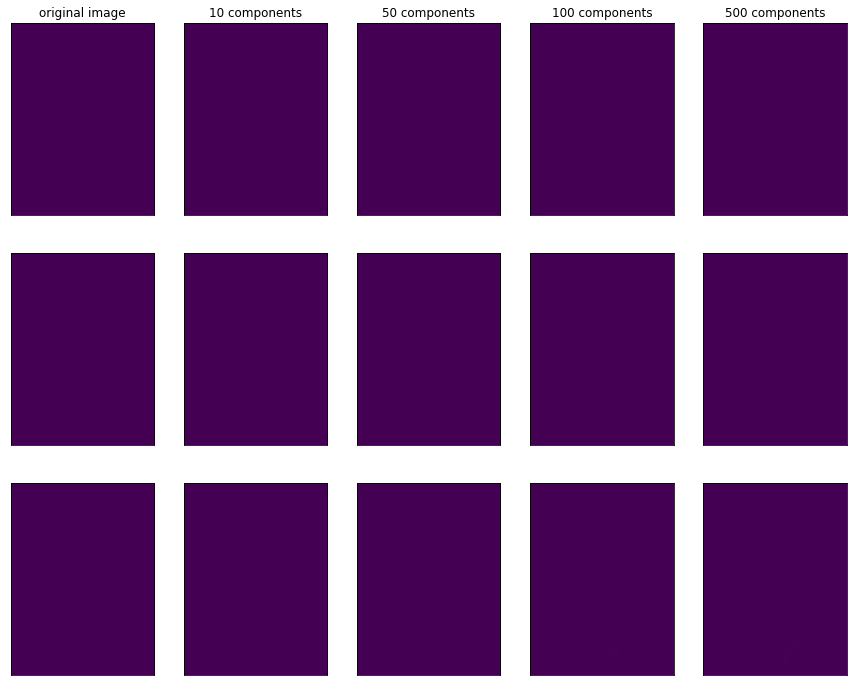

In [45]:
mglearn.plots.plot_nmf_faces(xtr,xte,image_shape)

C:\anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


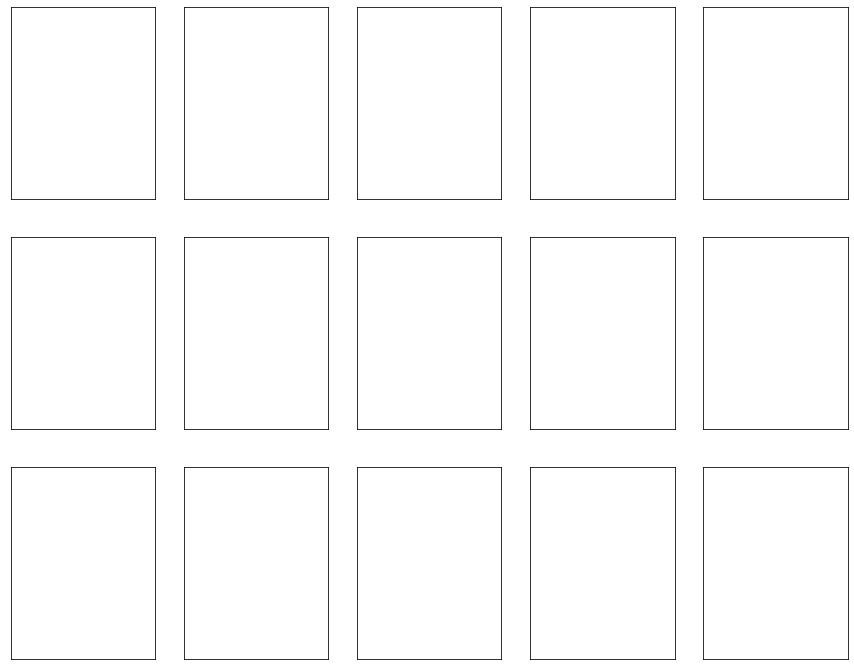

In [44]:
from sklearn.decomposition import NMF
nmf=NMF(n_components=15,random_state=0)
nmf.fit(xtr)
xtr_nmf=nmf.transform(xtr)
xte_nmf=nmf.transform(xte)
fig,axes=plt.subplots(3,5,figsize=(15,12),subplot_kw={'xticks': (), 'yticks': ()})
for i,(component,axes) in enumerate(zip(nmf.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{} component".format(i))


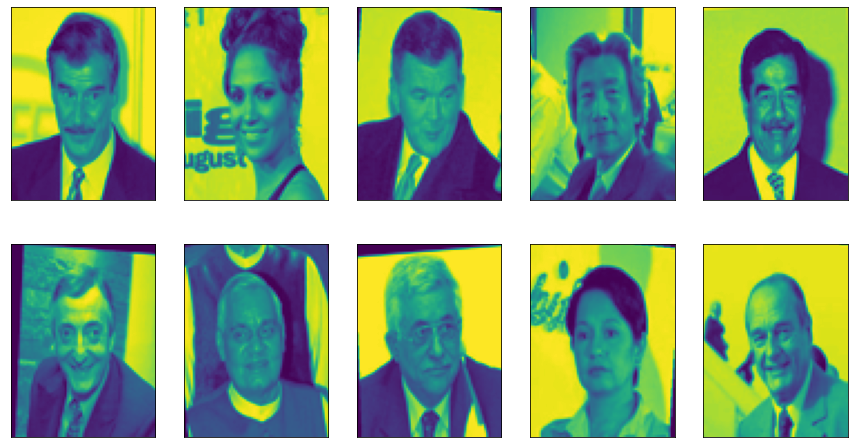

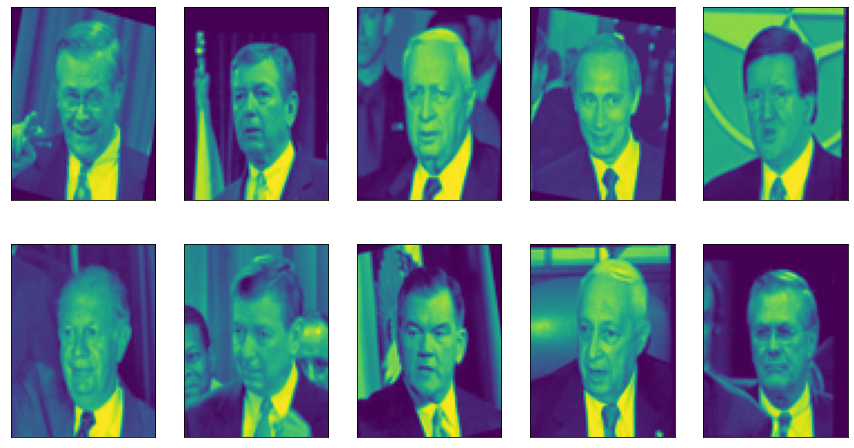

In [46]:
compn=3
inds=np.argsort(xtr_nmf[:,compn])[::-1]
fig,axes=plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})
for i,(ind,ax) in enumerate(zip(inds,axes.ravel())):
    ax.imshow(xtr[ind].reshape(image_shape))
compn=7
inds=np.argsort(xtr_nmf[:,compn])[::-1]
fig,axes=plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})
for i,(ind,ax) in enumerate(zip(inds,axes.ravel())):
    ax.imshow(xtr[ind].reshape(image_shape))

Text(0, 0.5, 'Signal')

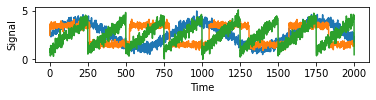

In [48]:
s=mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(s,'-')
plt.xlabel("Time")
plt.ylabel("Signal")

In [50]:
import numpy as np
a=np.random.RandomState(0).uniform(size=(100,3))
X=np.dot(s,a.T)


In [51]:
print(X.shape
     )

(2000, 100)


In [54]:
nmf=NMF(n_components=3,random_state=42)
S_nmf=nmf.fit_transform(X)

pca=PCA(n_components=3)
s_pca=pca.fit_transform(X)

print(S_nmf.shape,s_pca.shape)

(2000, 3) (2000, 3)
